# ANZ Virtual Internship Report

### Exploratory  Data  Analysis

##### Submitted by - Plabanjit Karmakar

## 1. Data Preprocessing and Feature Engineering

In [1]:
#importing packages for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates
from matplotlib import rc
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
pd.options.display.max_columns = None
df=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
#Shape of the data
df.shape

(12043, 23)

In [4]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
#No. of unique values in each column.
column_list = df.columns.tolist()
for column in column_list:
    print( column, ':', df[column].nunique())

status : 2
card_present_flag : 2
bpay_biller_code : 3
account : 100
currency : 1
long_lat : 100
txn_description : 6
merchant_id : 5725
merchant_code : 1
first_name : 80
balance : 12006
date : 91
gender : 2
age : 33
merchant_suburb : 1609
merchant_state : 8
extraction : 9442
amount : 4457
transaction_id : 12043
country : 1
customer_id : 100
merchant_long_lat : 2703
movement : 2


The above piece of code shows the number of unique values in each of the columns. 

The dataset contains 12043 transactions for 100 customers who have one bank account each. Trasactional period
is from 01/08/2018 - 31/10/2018 (92 days duration). The data entries are unique and have consistent formats for
analysis. For each record/row, information is complete for majority of columns. Some columns contain missing
data (blank or NA cells), which is likely due to the nature of transaction. (i.e. merchants are not involved for
InterBank transfers or Salary payments) It is also noticed that there is only 91 unique dates in the dataset,
suggesting the transaction records for one day are missing (turned out to be 2018-08-16).

Here we are particularly interested in the 'movement' column and we have found out that there are only two types of transaction took place. Hence we create two columns in the dataframe showing the debit and credit amounts. 

#### Adding Debit & Credit Amount Columns in Dataframe

In [6]:
#Creating Duplicate Dataframe
df_new=df.copy(deep=True)

In [7]:
#Creating two new columns from amount
df_new['Debit_amount'] = np.where(df['movement'] == 'debit', df['amount'], np.nan)
df_new['Credit_amount'] = np.where(df['movement'] == 'credit', df['amount'], np.nan)
df_new.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Debit_amount,Credit_amount
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,16.25,NaN
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,14.19,NaN
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,6.42,NaN
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,40.90,NaN
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,3.25,NaN


#### Dealing with Missing Values

In [8]:
# total null values
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [9]:
# classifying NA as categorical or numerical 

NA=df[['card_present_flag','bpay_biller_code','merchant_id','merchant_code','merchant_suburb','merchant_state','merchant_long_lat']]
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(NAcat.shape[1],'categorical features with missing values')
print(NAnum.shape[1],'numerical features with missing values')

5 categorical features with missing values
2 numerical features with missing values


In [10]:
# Calculating Percentage of Missing Values in Each Column
df.isna().sum()/len(df) * 100

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

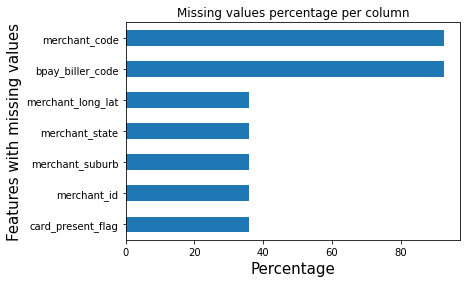

In [11]:
# visulaizing missing values percentage

plt.figure()
allna = (df.isnull().sum() / len(df))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
allna.plot.barh()
plt.title('Missing values percentage per column')
plt.xlabel('Percentage', fontsize=15)
plt.ylabel('Features with missing values',fontsize=15)
#plt.yticks(weight='bold')
plt.show()

From the above piece of code, we get some information about missing values, which should be dealt carefully in order to do further analysis. Here we gather an idea about dropping columns with highest number of missing values. As we can see merchant_code and bpay_biller_code more than 90% missing values, we should drop these two columns from the dataset.

In [12]:
# we should drop merchant_code &bpay_biller_code
# removing columns
df.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)

#### Summary of dataset

In [13]:
#Summary of df_new
df_new.describe()

,card_present_flag,merchant_code,balance,age,amount,Debit_amount,Credit_amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,11160.000000,883.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,52.572343,1898.728029
std,0.398029,0.0,31503.722652,10.046343,592.599934,156.354143,1150.364621
min,0.000000,0.0,0.240000,18.000000,0.100000,0.100000,576.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,15.190000,1013.670000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,26.930000,1626.480000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,45.000000,2538.680000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,7081.090000,8835.980000


Executing the following piece of code, we get a glimpse of some summery statistics. We can see debit amount on an average in 52.57 AUD, whereas mean credit amount is much higher, which is 1898.73 AUD.

But we also see a significant difference between mean and median, which indicates that the variables are skewed. As mean is effected by extreme values, in this case we prefer median to mean as a measure of central tendency.

So, the median Transaction amount is AUD 29 whereas, median Debit Transaction amount is AUD 26.93 and median Credit Transaction amount is AUD 1626.48

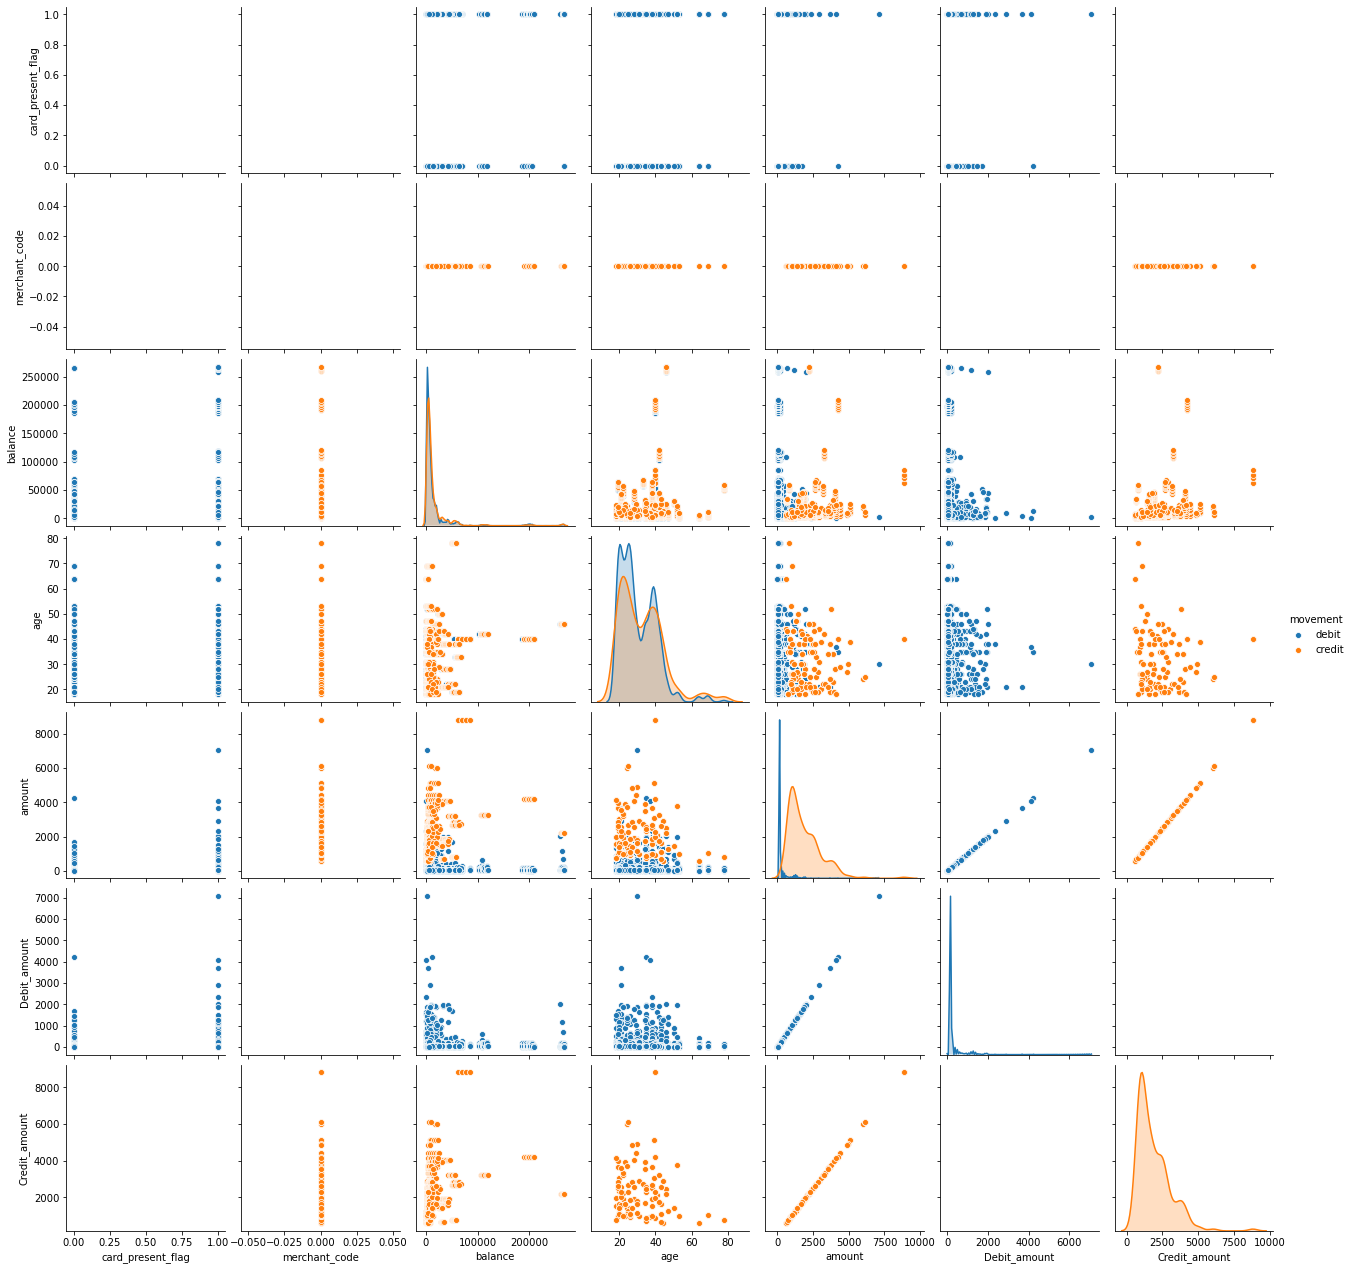

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_new, hue='movement')

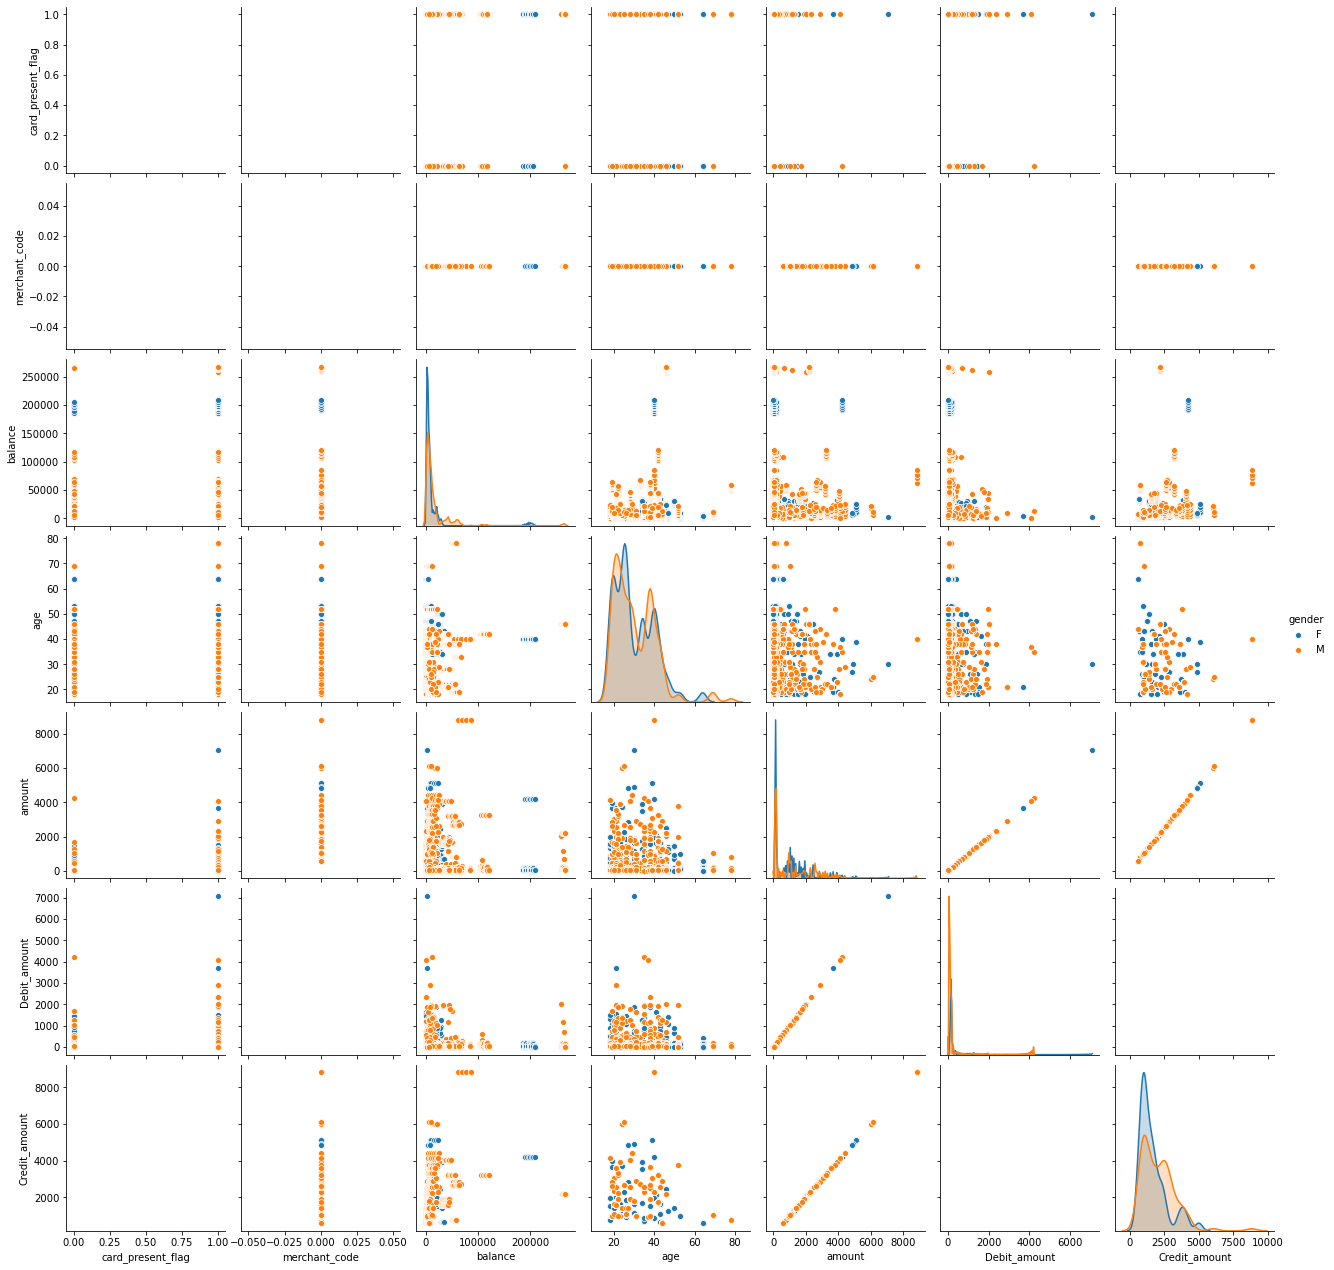

In [15]:
sns.pairplot(df_new, hue='gender')

## 2. Transaction Status

In [16]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

Authorized Transactions are those that still need to be settled by a retailer or service provider. Most transactions stay authorized for 3-5 days. 

A posted transaction is a debit or credit that has been fully processed. Once a transaction is posted the account balance on the account is also updated. 

When a retailer or service provider finishes the work on their end, the transaction will move to Posted Transactions.

#### Transaction Status (Movement wise)

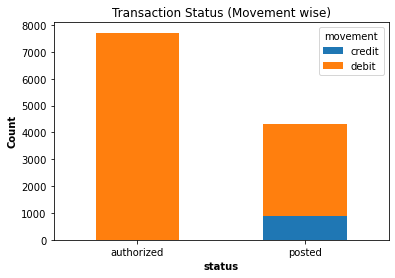

In [17]:
#Visualization of Transaction Status (Movement wise)
loc_plt=pd.crosstab(df['status'],df['movement'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Transaction Status (Movement wise)',fontsize=12)
plt.ylabel('Count',fontsize=10, fontweight='bold')
plt.xlabel('status',fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10);

#### Transaction Status (Gender wise)

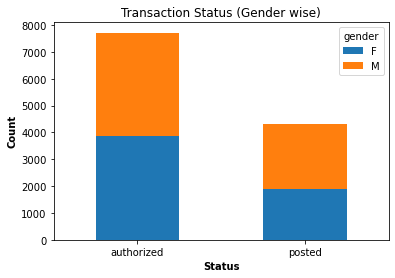

In [18]:
#Visualization of Transaction Status (Gender wise)
loc_plt=pd.crosstab(df['status'],df['gender'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Transaction Status (Gender wise)',fontsize=12)
plt.ylabel('Count',fontsize=10, fontweight='bold')
plt.xlabel('Status',fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10);

#### Grouping the data by_status_txn_description_count

In [19]:
by_status_txn_description_count = df.groupby([
'status', 'txn_description' 
]).count()

In [20]:
by_status_txn_description_count = by_status_txn_description_count.unstack().fillna(0)
by_status_txn_description_count 

card_present_flag                                        \
txn_description        INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                    
authorized                    0.0        0.0     0.0        0.0  3783.0   
posted                        0.0        0.0     0.0        0.0     0.0   

                             account                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                            currency                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                            long_lat                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                          merchant_id                                        \
txn_description SALES-POS  INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                        
authorized         3934.0         0.0        0.0     0.0        0.0  3783.0   
posted                0.0         0.0        0.0     0.0        0.0     0.0   

                          first_name                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                             balance                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                                date                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                              gender                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                                 age                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                       
authorized         3934.0        0.0        0.0     0.0        0.0  3783.0   
posted                0.0      742.0      883.0  2600.0      101.0     0.0   

                          merchant_suburb                                \
txn_description SALES-POS      INTER BANK

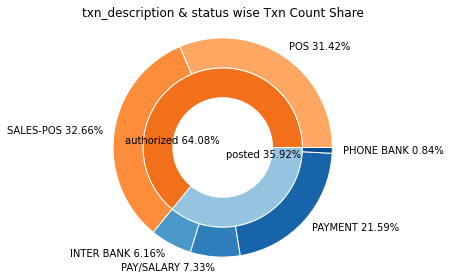

In [21]:
#Donut_by_status_txn_description_count 
import matplotlib.pyplot as plt

# Make data: I have 2 groups and 6 subgroups
group_names=['authorized 64.08%', 'posted 35.92%']
group_size=[7717.0, 4326.0 ]
subgroup_names=['POS 31.42%', 'SALES-POS 32.66%',  'INTER BANK 6.16%', 'PAY/SALARY 7.33%',
                'PAYMENT 21.59%', 'PHONE BANK 0.84%']
subgroup_size=[3783.0 , 3934.0, 742.0 , 883.0 , 2600.0, 101.0]
 
# Create colors
a, b =[plt.cm.Oranges, plt.cm.Blues]
 
# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1-0.3, labels=group_names, labeldistance=0.1, colors=[a(0.6), b(0.4)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names,  
                   colors=[a(0.4), a(0.5), b(0.6), b(0.7), b(0.8), b(0.9)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('txn_description & status wise Txn Count Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

#### Grouping the data by_status_txn_description_sum

In [22]:
by_status_txn_description_sum = df.groupby([
'status', 'txn_description' 
]).sum()

In [23]:
by_status_txn_description_sum = by_status_txn_description_sum.unstack().fillna(0)
by_status_txn_description_sum

card_present_flag                                        \
txn_description        INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
status                                                                    
authorized                    0.0        0.0     0.0        0.0  3025.0   
posted                        0.0        0.0     0.0        0.0     0.0   

                               balance                                        \
txn_description SALES-POS   INTER BANK   PAY/SALARY      PAYMENT  PHONE BANK   
status                                                                         
authorized         3169.0         0.00         0.00         0.00        0.00   
posted                0.0  17676922.73  14342444.54  49642900.35  3811415.76   

                                                age                      \
txn_description         POS    SALES-POS INTER BANK PAY/SALARY  PAYMENT   
status                                                                    
authorized       44907895.2  46701048.47        0.0        0.0      0.0   
posted                  0.0         0.00    22996.0    28814.0  81289.0   

                                                   amount              \
txn_description PHONE BANK       POS SALES-POS INTER BANK  PAY/SALARY   
status                                                                  
authorized             0.0  113809.0  118103.0        0.0        0.00   
posted              3292.0       0.0       0.0    64331.0  1676576.85   

                                                            
txn_description   PAYMENT PHONE BANK        POS  SALES-POS  
status                                                      
authorized            0.0        0.0  152861.24  157005.11  
posted           201794.0    10716.0       0.00       0.00

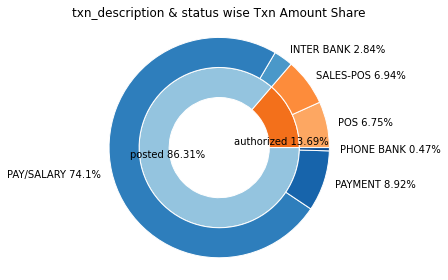

In [24]:
#Donut_by_status_txn_description_sum
import matplotlib.pyplot as plt
# Make data: I have 2 groups and 6 subgroups
group_names=['authorized 13.69%', 'posted 86.31%']
group_size=[309866.35, 1953417.85 ]
subgroup_names=['POS 6.75%', 'SALES-POS 6.94%', 'INTER BANK 2.84%', 'PAY/SALARY 74.1%',  'PAYMENT 8.92%', 'PHONE BANK 0.47%']
subgroup_size=[152861.24 , 157005.11, 64331.00 , 1676576.85 , 201794.00 , 10716.00]
 
# Create colors
a, b =[plt.cm.Oranges, plt.cm.Blues]
 
# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1-0.3, labels=group_names, labeldistance=0.2, colors=[a(0.6), b(0.4)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names,  
                   colors=[a(0.4), a(0.5), b(0.6), b(0.7), b(0.8), b(0.9)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('txn_description & status wise Txn Amount Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

## 3. Transaction Description 

In [25]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

#### grouping the data by_txn_description_gender_count

In [26]:
by_txn_description_gender_count = df.groupby([
'txn_description', 'gender' 
]).count()

In [27]:
by_txn_description_gender_count = by_txn_description_gender_count.unstack().fillna(0) 
by_txn_description_gender_count

status       card_present_flag       account       currency  \
gender               F     M                 F     M       F     M        F   
txn_description                                                               
INTER BANK         344   398                 0     0     344   398      344   
PAY/SALARY         419   464                 0     0     419   464      419   
PAYMENT           1107  1493                 0     0    1107  1493     1107   
PHONE BANK          26    75                 0     0      26    75       26   
POS               1921  1862              1921  1862    1921  1862     1921   
SALES-POS         1941  1993              1941  1993    1941  1993     1941   

                      long_lat       merchant_id       first_name        \
gender              M        F     M           F     M          F     M   
txn_description                                                           
INTER BANK        398      344   398           0     0        344   398   
PAY/SALARY        464      419   464           0     0        419   464   
PAYMENT          1493     1107  1493           0     0       1107  1493   
PHONE BANK         75       26    75           0     0         26    75   
POS              1862     1921  1862        1921  1862       1921  1862   
SALES-POS        1993     1941  1993        1941  1993       1941  1993   

                balance        date         age       merchant_suburb        \
gender                F     M     F     M     F     M               F     M   
txn_description                                                               
INTER BANK          344   398   344   398   344   398               0     0   
PAY/SALARY          419   464   419   464   419   464               0     0   
PAYMENT            1107  1493  1107  1493  1107  1493               0     0   
PHONE BANK           26    75    26    75    26    75               0     0   
POS                1921  1862  1921  1862  1921  1862            1921  1862   
SALES-POS          1941  1993  1941  1993  1941  1993            1941  1993   

                merchant_state       extraction       amount        \
gender                       F     M          F     M      F     M   
txn_description                                                      
INTER BANK                   0     0        344   398    344   398   
PAY/SALARY                   0     0        419   464    419   464   
PAYMENT                      0     0       1107  1493   1107  1493   
PHONE BANK                   0     0         26    75     26    75   
POS                       1921  1862       1921  1862   1921  1862   
SALES-POS                 1941  1993       1941  1993   1941  1993   

                transaction_id       country       customer_id        \
gender                       F     M       F     M           F     M   
txn_description                                                        
INTER BANK                 344   398     344   398         344   398   
PAY/SALARY                 419   464     419   464         419   464   
PAYMENT                   1107  1493    1107  1493        1107  1493   
PHONE BANK                  26    75      26    75          26    75   
POS                       1921  1862    1921  1862        1921  1862   
SALES-POS                 1941  1993    1941  1993        1941  1993   

                merchant_long_lat       movement        
gender                          F     M        F     M  
txn_description                                         
INTER BANK                      0     0      344   398  
PAY/SALARY                      0     0      419   464  
PAYMENT                         0     0     1107  1493  
PHONE BANK                      0     0       26    75  
POS                          1921  1862     1921  1862  
SALES-POS                    1941  1993     1941  1993

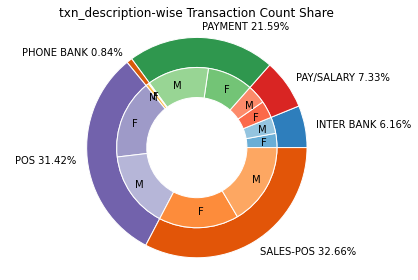

In [28]:
#Donut_by_txn_description_gender_count
import matplotlib.pyplot as plt
 
# Make data: I have 6 groups and 12 subgroups
group_names=['INTER BANK 6.16%', 'PAY/SALARY 7.33%', 'PAYMENT 21.59%', 'PHONE BANK 0.84%', 'POS 31.42%', 'SALES-POS 32.66%']
group_size=[742, 883,2600,101,3783,3934]
subgroup_names=['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
subgroup_size=[344,398,419,464,1107,1493, 26,75,1921,1862,1941,1993]
 
# Create colors
a, b, c, d, e, f =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,  plt.cm.YlOrBr,  plt.cm.Purples, plt.cm.Oranges ]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1, labels=group_names, colors=[a(0.7), b(0.7), c(0.7), d(0.7), e(0.7), f(0.7)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1-0.3, labels=subgroup_names, labeldistance=0.8 ,
colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4), d(0.5), d(0.4), e(0.5), e(0.4), f(0.5), f(0.4)])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('txn_description-wise Transaction Count Share')
plt.margins(0,0)

plt.tight_layout() 
# show it
plt.show()


#### grouping the data by_txn_description_gender_sum

In [29]:
by_txn_description_gender_sum = df.groupby([
'txn_description', 'gender' 
]).sum()

In [30]:
by_txn_description_gender_sum = by_txn_description_gender_sum.unstack().fillna(0) 
by_txn_description_gender_sum

card_present_flag              balance                 age  \
gender                          F       M            F            M      F   
txn_description                                                              
INTER BANK                    0.0     0.0   5324032.46  12352890.27  10030   
PAY/SALARY                    0.0     0.0   4913956.70   9428487.84  13502   
PAYMENT                       0.0     0.0  16552464.60  33090435.75  34545   
PHONE BANK                    0.0     0.0   2506722.85   1304692.91    978   
POS                        1531.0  1494.0  20098842.85  24809052.35  57735   
SALES-POS                  1571.0  1598.0  20052718.10  26648330.37  58603   

                           amount             
gender               M          F          M  
txn_description                               
INTER BANK       12966   26449.00   37882.00  
PAY/SALARY       15312  703656.23  972920.62  
PAYMENT          46744   85033.00  116761.00  
PHONE BANK        2314    4237.00    6479.00  
POS              56074   74126.26   78734.98  
SALES-POS        59500   76821.14   80183.97

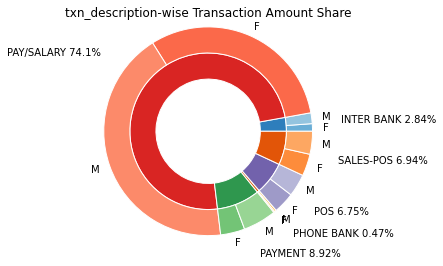

In [31]:
#Donut_by_txn_description_gender_sum
import matplotlib.pyplot as plt

# Make data: I have 6 groups and 12 subgroups
group_names=['INTER BANK 2.84%', 'PAY/SALARY 74.1%', 'PAYMENT 8.92%', 'PHONE BANK 0.47%', 'POS 6.75%', 'SALES-POS 6.94%']
group_size=[64331, 1676576.85, 201794, 10716, 152861.24, 157005.11]
subgroup_names=['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
subgroup_size=[26449, 37882, 703656.23, 972920.62, 85033, 116761, 4237, 6479, 74126.26, 78734.98, 76821.14, 80183.97]
 
# Create colors
a, b, c, d, e, f =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,  plt.cm.YlOrBr,  plt.cm.Purples, plt.cm.Oranges ]
# Second Ring (Inside) 

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2-0.3, labels=group_names, labeldistance=1.7,
                  colors=[a(0.7), b(0.7), c(0.7), d(0.7), e(0.7), f(0.7)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# First Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2 , labels=subgroup_names, 
colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4), d(0.5), d(0.4), e(0.5), e(0.4), f(0.5), f(0.4)])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('txn_description-wise Transaction Amount Share')
plt.margins(0,0)
 
# show it
plt.show()

#### grouping the data by_movement_txn_description_count

In [32]:
by_movement_txn_description_count = df.groupby([
'movement', 'txn_description' 
]).count()

In [33]:
by_movement_txn_description_count = by_movement_txn_description_count.unstack().fillna(0)
by_movement_txn_description_count

status                                                  \
txn_description INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS SALES-POS   
movement                                                                     
credit                 0.0      883.0     0.0        0.0     0.0       0.0   
debit                742.0        0.0  2600.0      101.0  3783.0    3934.0   

                card_present_flag                                        \
txn_description        INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                  
credit                        0.0        0.0     0.0        0.0     0.0   
debit                         0.0        0.0     0.0        0.0  3783.0   

                             account                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                            currency                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                            long_lat                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                          merchant_id                                        \
txn_description SALES-POS  INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                      
credit                0.0         0.0        0.0     0.0        0.0     0.0   
debit              3934.0         0.0        0.0     0.0        0.0  3783.0   

                          first_name                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                             balance                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                                date                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                              gender                                        \
txn_description SALES-POS INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                     
credit                0.0        0.0      883.0     0.0        0.0     0.0   
debit              3934.0      742.0        0.0  2600.0      101.0  3783.0   

                                 age                                        \
txn_description SALES-POS INTER BANK PAY/S

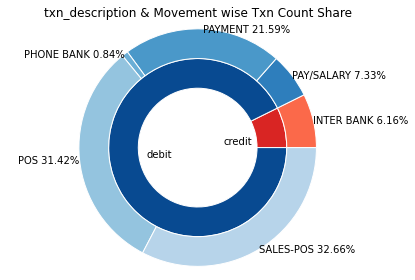

In [34]:
#Donut_by_movement_txn_description_count
import matplotlib.pyplot as plt
 
# Make data: I have 2 groups and 6 subgroups
group_names=['credit', 'debit']
group_size=[883.0, 11160.0 ]
subgroup_names=['INTER BANK 6.16%', 'PAY/SALARY 7.33%', 'PAYMENT 21.59%', 'PHONE BANK 0.84%', 'POS 31.42%', 'SALES-POS 32.66%']
subgroup_size=[883.0, 742.0, 2600.0, 101.0, 3783.0, 3934.0 ]
 
# Create colors
a, b =[plt.cm.Reds, plt.cm.Blues]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2-0.3, labels=group_names, labeldistance=0.3, colors=[a(0.7), b(0.9)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2, labels=subgroup_names, labeldistance=1,  
                   colors=[a(0.5), b(0.7), b(0.6), b(0.5), b(0.4), b(0.3)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('txn_description & Movement wise Txn Count Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

#### grouping the data by_movement_txn_description_sum

In [35]:
by_movement_txn_description_sum = df.groupby([
'movement', 'txn_description' 
]).sum()

In [36]:
by_movement_txn_description_sum = by_movement_txn_description_sum.unstack().fillna(0)
by_movement_txn_description_sum 

card_present_flag                                        \
txn_description        INTER BANK PAY/SALARY PAYMENT PHONE BANK     POS   
movement                                                                  
credit                        0.0        0.0     0.0        0.0     0.0   
debit                         0.0        0.0     0.0        0.0  3025.0   

                               balance                                        \
txn_description SALES-POS   INTER BANK   PAY/SALARY      PAYMENT  PHONE BANK   
movement                                                                       
credit                0.0         0.00  14342444.54         0.00        0.00   
debit              3169.0  17676922.73         0.00  49642900.35  3811415.76   

                                                age                      \
txn_description         POS    SALES-POS INTER BANK PAY/SALARY  PAYMENT   
movement                                                                  
credit                  0.0         0.00        0.0    28814.0      0.0   
debit            44907895.2  46701048.47    22996.0        0.0  81289.0   

                                                   amount              \
txn_description PHONE BANK       POS SALES-POS INTER BANK  PAY/SALARY   
movement                                                                
credit                 0.0       0.0       0.0        0.0  1676576.85   
debit               3292.0  113809.0  118103.0    64331.0        0.00   

                                                            
txn_description   PAYMENT PHONE BANK        POS  SALES-POS  
movement                                                    
credit                0.0        0.0       0.00       0.00  
debit            201794.0    10716.0  152861.24  157005.11

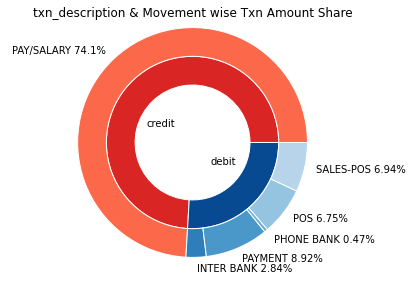

In [37]:
#Donut_by_movement_txn_description_sum 
import matplotlib.pyplot as plt
 
# Make data: I have 2 groups and 6 subgroups
group_names=['credit', 'debit']
group_size=[1676576.85, 586707.35 ]
subgroup_names=['PAY/SALARY 74.1%', 'INTER BANK 2.84%', 'PAYMENT 8.92%', 
'PHONE BANK 0.47%', 'POS 6.75%', 'SALES-POS 6.94%']
subgroup_size=[1676576.85, 64331.00, 201794.0, 10716.00, 152861.24, 157005.11 ]
 
# Create colors
a, b =[plt.cm.Reds, plt.cm.Blues]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2-0.3, labels=group_names, labeldistance=0.3, colors=[a(0.7), b(0.9)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2, labels=subgroup_names, 
                   colors=[a(0.5), b(0.7), b(0.6), b(0.5), b(0.4), b(0.3)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('txn_description & Movement wise Txn Amount Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

## 4. Month Wise Transaction Analysis

#### day and month extraction from date column

In [38]:
# converting the date column to pandas Timestap
df_new['date'] = pd.to_datetime(df_new['date'])

In [39]:
# extracting day name 
df_new['day_name'] = df_new['date'].dt.day_name()
df_new['day_name'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_name, dtype: object

In [40]:
# extracting month name
df_new['month_name'] = df_new['date'].dt.month_name()
df_new['month_name'].head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

In [41]:
# months generated
df_new['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

In [42]:
df_new.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Debit_amount,Credit_amount,day_name,month_name
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,16.25,NaN,Wednesday,August
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,14.19,NaN,Wednesday,August
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,6.42,NaN,Wednesday,August
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,40.90,NaN,Wednesday,August
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,3.25,NaN,Wednesday,August


#### grouping the data by_month_name_movement_count

In [43]:
by_month_name_movement_count = df_new.groupby([
'month_name', 'movement' 
]).count()

In [44]:
by_month_name_movement_count = by_month_name_movement_count.unstack().fillna(0)
by_month_name_movement_count

status       card_present_flag       bpay_biller_code        \
movement   credit debit            credit debit           credit debit   
month_name                                                               
August        298  3645                 0  2535              298     1   
October       313  3774                 0  2581              313     0   
September     272  3741                 0  2601              272     1   

           account       currency       long_lat       txn_description        \
movement    credit debit   credit debit   credit debit          credit debit   
month_name                                                                     
August         298  3645      298  3645      298  3645             298  3645   
October        313  3774      313  3774      313  3774             313  3774   
September      272  3741      272  3741      272  3741             272  3741   

           merchant_id       merchant_code       first_name       balance  \
movement        credit debit        credit debit     credit debit  credit   
month_name                                                                  
August               0  2535           298     0        298  3645     298   
October              0  2581           313     0        313  3774     313   
September            0  2601           272     0        272  3741     272   

                   date       gender          age       merchant_suburb        \
movement   debit credit debit credit debit credit debit          credit debit   
month_name                                                                      
August      3645    298  3645    298  3645    298  3645               0  2535   
October     3774    313  3774    313  3774    313  3774               0  2581   
September   3741    272  3741    272  3741    272  3741               0  2601   

           merchant_state       extraction       amount       transaction_id  \
movement           credit debit     credit debit credit debit         credit   
month_name                                                                     
August                  0  2535        298  3645    298  3645            298   
October                 0  2581        313  3774    313  3774            313   
September               0  2601        272  3741    272  3741            272   

                 country       customer_id       merchant_long_lat        \
movement   debit  credit debit      credit debit            credit debit   
month_name                                                                 
August      3645     298  3645         298  3645                 0  2535   
October     3774     313  3774         313  3774                 0  2581   
September   3741     272  3741         272  3741                 0  2601   

           Debit_amount       Credit_amount       day_name        
movement         credit debit        credit debit   credit debit  
month_name                                                        
August                0  3645           298     0      298  3645  
October               0  3774           313     0      313  3774  
September             0  3741           272     0      272  3741

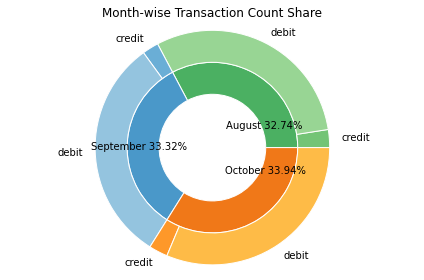

In [45]:
#Donut_by_month_name_movement_count
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 6 subgroups
group_names=['August 32.74%', 'September 33.32%', 'October 33.94%']
group_size=[3943, 4013, 4087 ]
subgroup_names=['credit', 'debit', 'credit', 'debit', 'credit', 'debit']
subgroup_size=[298 , 3645 , 272, 3741,313, 3774 ]
 
# Create colors
a, b, c =[plt.cm.Greens, plt.cm.Blues, plt.cm.YlOrBr ]
 
# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1-0.3, labels=group_names, labeldistance=0.3, colors=[a(0.6), b(0.6), c(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names,  
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('Month-wise Transaction Count Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

#### grouping the data by_month_name_movement_sum

In [46]:
by_month_name_movement_sum = df_new.groupby([
'month_name', 'movement' 
]).sum()

In [47]:
by_month_name_movement_sum = by_month_name_movement_sum.unstack().fillna(0)
by_month_name_movement_sum

card_present_flag         merchant_code           balance  \
movement              credit   debit        credit debit      credit   
month_name                                                             
August                   0.0  2041.0           0.0   0.0  3712788.11   
October                  0.0  2074.0           0.0   0.0  6210112.27   
September                0.0  2079.0           0.0   0.0  4419544.16   

                           age             amount            Debit_amount  \
movement          debit credit   debit     credit      debit       credit   
month_name                                                                  
August      38848539.90   9748  110446  559814.33  170121.19          0.0   
October     69199090.26  10172  115406  600166.91  202631.56          0.0   
September   54692552.35   8894  113637  516595.61  213954.60          0.0   

                      Credit_amount        
movement        debit        credit debit  
month_name                                 
August      170121.19     559814.33   0.0  
October     202631.56     600166.91   0.0  
September   213954.60     516595.61   0.0

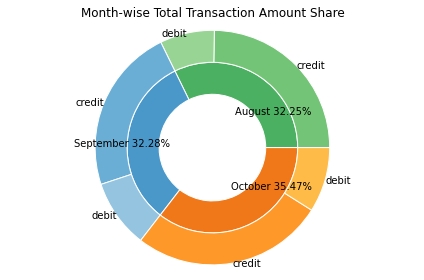

In [48]:
#Donut_by_month_name_movement_sum
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 6 subgroups
group_names=['August 32.25%', 'September 32.28%', 'October 35.47%']
group_size=[729935.52, 730550.21, 802798.47 ]
subgroup_names=['credit', 'debit', 'credit', 'debit', 'credit', 'debit']
subgroup_size=[559814.33 , 170121.19 , 516595.61, 213954.60,600166.91, 202631.56 ]
 
# Create colors
a, b, c =[plt.cm.Greens, plt.cm.Blues, plt.cm.YlOrBr ]
 
# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1-0.3, labels=group_names, labeldistance=0.5, colors=[a(0.6), b(0.6), c(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names, labeldistance=1, 
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('Month-wise Total Transaction Amount Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

Apparently all three months almost same weightage in terms of Txn count and Txn amount. 

But, highest transaction has occurred in the month of October among these three.

## 5. Weekdays Wise Transaction Analysis

#### grouping the data by_day_name_movement_count

In [49]:
by_day_name_movement_count = df_new.groupby([
'day_name', 'movement' 
]).count()

In [50]:
by_day_name_movement_count = by_day_name_movement_count.unstack().fillna(0)
by_day_name_movement_count

status         card_present_flag         bpay_biller_code        \
movement  credit   debit            credit   debit           credit debit   
day_name                                                                    
Friday     201.0  1872.0               0.0  1317.0            201.0   0.0   
Monday     207.0  1153.0               0.0   742.0            207.0   0.0   
Saturday     0.0  1709.0               0.0  1337.0              0.0   1.0   
Sunday       0.0  1550.0               0.0  1126.0              0.0   0.0   
Thursday   143.0  1658.0               0.0  1103.0            143.0   0.0   
Tuesday    160.0  1327.0               0.0   841.0            160.0   1.0   
Wednesday  172.0  1891.0               0.0  1251.0            172.0   0.0   

          account         currency         long_lat         txn_description  \
movement   credit   debit   credit   debit   credit   debit          credit   
day_name                                                                      
Friday      201.0  1872.0    201.0  1872.0    201.0  1872.0           201.0   
Monday      207.0  1153.0    207.0  1153.0    207.0  1153.0           207.0   
Saturday      0.0  1709.0      0.0  1709.0      0.0  1709.0             0.0   
Sunday        0.0  1550.0      0.0  1550.0      0.0  1550.0             0.0   
Thursday    143.0  1658.0    143.0  1658.0    143.0  1658.0           143.0   
Tuesday     160.0  1327.0    160.0  1327.0    160.0  1327.0           160.0   
Wednesday   172.0  1891.0    172.0  1891.0    172.0  1891.0           172.0   

                  merchant_id         merchant_code       first_name          \
movement    debit      credit   debit        credit debit     credit   debit   
day_name                                                                       
Friday     1872.0         0.0  1317.0         201.0   0.0      201.0  1872.0   
Monday     1153.0         0.0   742.0         207.0   0.0      207.0  1153.0   
Saturday   1709.0         0.0  1337.0           0.0   0.0        0.0  1709.0   
Sunday     1550.0         0.0  1126.0           0.0   0.0        0.0  1550.0   
Thursday   1658.0         0.0  1103.0         143.0   0.0      143.0  1658.0   
Tuesday    1327.0         0.0   841.0         160.0   0.0      160.0  1327.0   
Wednesday  1891.0         0.0  1251.0         172.0   0.0      172.0  1891.0   

          balance           date         gender            age          \
movement   credit   debit credit   debit credit   debit credit   debit   
day_name                                                                 
Friday      201.0  1872.0  201.0  1872.0  201.0  1872.0  201.0  1872.0   
Monday      207.0  1153.0  207.0  1153.0  207.0  1153.0  207.0  1153.0   
Saturday      0.0  1709.0    0.0  1709.0    0.0  1709.0    0.0  1709.0   
Sunday        0.0  1550.0    0.0  1550.0    0.0  1550.0    0.0  1550.0   
Thursday    143.0  1658.0  143.0  1658.0  143.0  1658.0  143.0  1658.0   
Tuesday     160.0  1327.0  160.0  1327.0  160.0  1327.0  160.0  1327.0   
Wednesday   172.0  1891.0  172.0  1891.0  172.0  1891.0  172.0  1891.0   

          merchant_suburb         merchant_state         extraction          \
movement           credit   debit         credit   debit     credit   debit   
day_name                                                                      
Friday                0.0  1317.0            0.0  1317.0      201.0  1872.0   
Monday                0.0   742.0            0.0   742.0      207.0  1153.0   
Saturday              0.0  1337.0            0.0  1337.0        0.0  1709.0   
Sunday                0.0  1126.0            0.0  1126.0        0.0  1550.0   
Thursday              0.0  1103.0            0.0  1103.0      143.0  1658.0   
Tuesday               0.0   841.0            0.0   841.0      160.0  1327.0   
Wednesday             0.0  1251.0            0.0  1251.0      172.0  1891.0   

          amount         transaction_id         country         customer_id  \
movement  credit   debit         cre

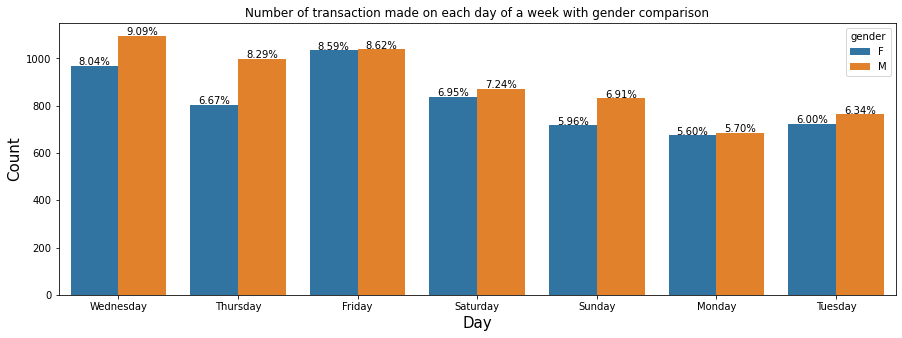

In [51]:
# visualize day wise gender transaction count
plt.figure(figsize=(15,5))
ax = sns.countplot(x="day_name", hue="gender", data=df_new) # for Seaborn version 0.7 and more
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.ylabel("Count",fontsize=15)
plt.xlabel("Day",fontsize=15)
plt.title('Number of transaction made on each day of a week with gender comparison')
plt.show()

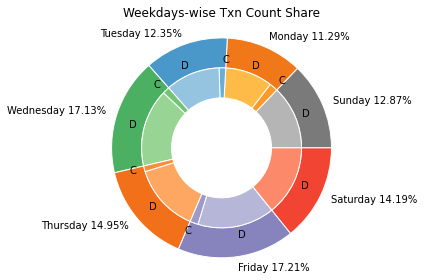

In [52]:
#Donut_by_day_name_movement_count
import matplotlib.pyplot as plt
 
# Make data: I have 7 groups and 12 subgroups
group_names=['Sunday 12.87%', 'Monday 11.29%', 'Tuesday 12.35%', 'Wednesday 17.13%', 'Thursday 14.95%', 'Friday 17.21%',
             'Saturday 14.19%']
group_size=[1550, 1360.0, 1487.0, 2063.0, 1801.0, 2073.0, 1709.0]
subgroup_names=[ '', 'D', 'C', 'D','C', 'D', 'C', 'D', 'C', 'D', 'C', 'D','', 'D' ]
subgroup_size=[0, 1550, 207.0, 1153.0, 160.0, 1327.0, 172.0, 1891.0 , 143.0, 1658.0, 201.0, 1872.0, 0, 1709.0 ]

# Create colors
a, b, c, d, e, f, g =[plt.cm.Greys, plt.cm.YlOrBr, plt.cm.Blues, plt.cm.Greens, plt.cm.Oranges, plt.cm.Purples, plt.cm.Reds ]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)
                                                                      ,d(0.6), e(0.6), f(0.6), g(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1-0.3, labels=subgroup_names,  
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4), d(0.5), d(0.4), e(0.5), e(0.4), f(0.5), f(0.4),
                          g(0.5), g(0.4)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('Weekdays-wise Txn Count Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

#### grouping the data by_day_name_movement_sum

In [53]:
by_day_name_movement_sum = df_new.groupby([
'day_name', 'movement' 
]).sum()

In [54]:
by_day_name_movement_sum = by_day_name_movement_sum.unstack().fillna(0)
by_day_name_movement_sum

card_present_flag         merchant_code           balance  \
movement             credit   debit        credit debit      credit   
day_name                                                              
Friday                  0.0  1058.0           0.0   0.0  4268622.08   
Monday                  0.0   588.0           0.0   0.0  4751544.97   
Saturday                0.0  1059.0           0.0   0.0        0.00   
Sunday                  0.0   892.0           0.0   0.0        0.00   
Thursday                0.0   901.0           0.0   0.0  1845416.91   
Tuesday                 0.0   679.0           0.0   0.0  1758344.41   
Wednesday               0.0  1017.0           0.0   0.0  1718516.17   

                           age              amount           Debit_amount  \
movement         debit  credit    debit     credit     debit       credit   
day_name                                                                    
Friday     24067712.78  6806.0  57210.0  427670.18  89239.66          0.0   
Monday     16212141.07  6514.0  34184.0  442167.65  65412.91          0.0   
Saturday   26263096.84     0.0  52644.0       0.00  93002.56          0.0   
Sunday     21139592.40     0.0  45963.0       0.00  82174.56          0.0   
Thursday   28554212.37  5050.0  51987.0  243725.41  87677.36          0.0   
Tuesday    20199826.76  5184.0  40897.0  255243.33  74240.86          0.0   
Wednesday  26303600.29  5260.0  56604.0  307770.28  94959.44          0.0   

                    Credit_amount        
movement      debit        credit debit  
day_name                                 
Friday     89239.66     427670.18   0.0  
Monday     65412.91     442167.65   0.0  
Saturday   93002.56          0.00   0.0  
Sunday     82174.56          0.00   0.0  
Thursday   87677.36     243725.41   0.0  
Tuesday    74240.86     255243.33   0.0  
Wednesday  94959.44     307770.28   0.0

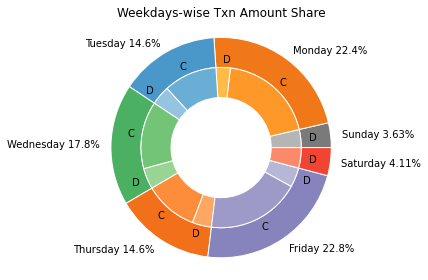

In [55]:
#Donut_by_day_name_movement_sum
import matplotlib.pyplot as plt
 
# Make data: I have 7 groups and 12 subgroups
group_names=['Sunday 3.63%', 'Monday 22.4%', 'Tuesday 14.6%', 'Wednesday 17.8%', 'Thursday 14.6%', 'Friday 22.8%', 
             'Saturday 4.11%']
group_size=[82174.56, 507580.56000000006, 331402.77, 402729.72000000003, 331402.77, 516909.83999999997, 93002.56]
subgroup_names=[ '', 'D', 'C', 'D','C', 'D', 'C', 'D', 'C', 'D', 'C', 'D','', 'D' ]
subgroup_size=[0, 82174.56, 442167.65, 65412.91, 243725.41, 87677.36,307770.28, 94959.44, 243725.41, 87677.36,
              427670.18, 89239.66, 0, 93002.56]

# Create colors
a, b, c, d, e, f, g =[plt.cm.Greys, plt.cm.YlOrBr, plt.cm.Blues, plt.cm.Greens, plt.cm.Oranges, plt.cm.Purples, plt.cm.Reds ]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.1, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)
                                                                      ,d(0.6), e(0.6), f(0.6), g(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.1-0.3, labels=subgroup_names,  
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4), d(0.5), d(0.4), e(0.5), e(0.4), f(0.5), f(0.4),
                          g(0.5), g(0.4)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('Weekdays-wise Txn Amount Share')
plt.margins(0,0)
plt.tight_layout() 
# show it
plt.show()

There is no significant difference in terms of Txn counts throughout the week.

No credit Txn in Saturdays & Sundays. 

Majority of Credit Txn amount has been reflected on Mondays and Fridays whereas Debit Amount Txn is more or less same throughout the week. 

## 6. Merchant State Wise Transaction Analysis

#### grouping the data by_merchant_state_gender_count

In [56]:
by_merchant_state_gender_count = df_new.groupby([
'merchant_state','gender' 
]).count()

In [57]:
by_merchant_state_gender_count = by_merchant_state_gender_count.unstack().fillna(0)
by_merchant_state_gender_count

status       card_present_flag       bpay_biller_code     \
gender              F     M                 F     M                F  M   
merchant_state                                                            
ACT                46    27                46    27                0  0   
NSW               980  1189               980  1189                0  1   
NT                200     5               200     5                0  0   
QLD               800   756               800   756                0  0   
SA                245   170               245   170                0  0   
TAS                16    52                16    52                0  0   
VIC               918  1213               918  1213                0  1   
WA                657   443               657   443                0  0   

               account       currency       long_lat       txn_description  \
gender               F     M        F     M        F     M               F   
merchant_state                                                               
ACT                 46    27       46    27       46    27              46   
NSW                980  1189      980  1189      980  1189             980   
NT                 200     5      200     5      200     5             200   
QLD                800   756      800   756      800   756             800   
SA                 245   170      245   170      245   170             245   
TAS                 16    52       16    52       16    52              16   
VIC                918  1213      918  1213      918  1213             918   
WA                 657   443      657   443      657   443             657   

                     merchant_id       merchant_code    first_name        \
gender             M           F     M             F  M          F     M   
merchant_state                                                             
ACT               27          46    27             0  0         46    27   
NSW             1189         980  1189             0  0        980  1189   
NT                 5         200     5             0  0        200     5   
QLD              756         800   756             0  0        800   756   
SA               170         245   170             0  0        245   170   
TAS               52          16    52             0  0         16    52   
VIC             1213         918  1213             0  0        918  1213   
WA               443         657   443             0  0        657   443   

               balance       date        age       merchant_suburb        \
gender               F     M    F     M    F     M               F     M   
merchant_state                                                             
ACT                 46    27   46    27   46    27              46    27   
NSW                980  1189  980  1189  980  1189             980  1189   
NT                 200     5  200     5  200     5             200     5   
QLD                800   756  800   756  800   756             800   756   
SA                 245   170  245   170  245   170             245   170   
TAS                 16    52   16    52   16    52              16    52   
VIC                918  1213  918  1213  918  1213             918  1213   
WA                 657   443  657   443  657   443             657   443   

               extraction       amount       transaction_id       country  \
gender                  F     M      F     M              F     M       F   
merchant_state                                                              
ACT                    46    27     46    27             46    27      46   
NSW                   980  1189    980  1189            980  1189     980   
NT                    200     5    200     5            200     5     200   
QLD                   800   756    800   756            800   756     800   
SA                    245   170    245   170            245   170     245   
TAS                    16    52     16  

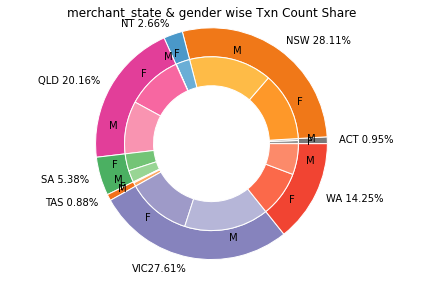

In [58]:
#Donut_by_merchant_state_gender_count
import matplotlib.pyplot as plt
 
# Make data: I have 8 groups and 16 subgroups
group_names=['ACT 0.95%', 'NSW 28.11%', 'NT 2.66%', 'QLD 20.16%', 'SA 5.38%', 'TAS 0.88%', 'VIC27.61%', 'WA 14.25%' ]
group_size=[73 ,2169 ,205,1556,415,68 ,2131,1100]
subgroup_names=[ 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
subgroup_size=[46,27, 980,1189, 200,5,800,756,245,170, 16,52,918,1213,657,443]

# Create colors
a, b, c, d, e, f, g, h =[plt.cm.Greys, plt.cm.YlOrBr, plt.cm.Blues, plt.cm.RdPu, plt.cm.Greens, plt.cm.Oranges,
                         plt.cm.Purples, plt.cm.Reds ]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)
                                                                      ,d(0.6), e(0.6), f(0.6), g(0.6), h(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2-0.3, labels=subgroup_names,  
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4), d(0.5), d(0.4), e(0.5), e(0.4), f(0.5), f(0.4),
                          g(0.5), g(0.4), h(0.5), h(0.4)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('merchant_state & gender wise Txn Count Share')
plt.margins(0,0)
plt.tight_layout()

# show it
plt.show()

#### grouping the data by_merchant_state_gender_sum

In [59]:
by_merchant_state_gender_sum = df_new.groupby([
'merchant_state','gender' 
]).sum()

In [60]:
by_merchant_state_gender_sum = by_merchant_state_gender_sum.unstack().fillna(0)
by_merchant_state_gender_sum

card_present_flag        merchant_code           balance  \
gender                         F      M             F    M            F   
merchant_state                                                            
ACT                         39.0   25.0           0.0  0.0    663951.76   
NSW                        784.0  928.0           0.0  0.0   8678729.83   
NT                         163.0    4.0           0.0  0.0    946134.77   
QLD                        645.0  621.0           0.0  0.0   2395555.00   
SA                         202.0  129.0           0.0  0.0   2770261.48   
TAS                         15.0   45.0           0.0  0.0     43436.35   
VIC                        727.0  992.0           0.0  0.0  20539592.58   
WA                         527.0  348.0           0.0  0.0   4113899.18   

                               age           amount           Debit_amount  \
gender                    M      F      M         F         M            F   
merchant_state                                                               
ACT               247767.46   1433    794   1657.44   3219.24      1657.44   
NSW             11814886.13  28423  36303  41430.88  60590.89     41430.88   
NT                190059.32   5346    209   8741.42    427.47      8741.42   
QLD              8639602.51  24248  22298  28611.05  24872.40     28611.05   
SA               1857125.51   7598   5222  11349.73   5426.84     11349.73   
TAS               733876.61    954   1372    622.72   1340.21       622.72   
VIC             21341479.14  31013  37271  38626.01  48957.99     38626.01   
WA               6632586.04  17323  12105  19908.15  14083.91     19908.15   

                         Credit_amount       
gender                 M             F    M  
merchant_state                               
ACT              3219.24           0.0  0.0  
NSW             60590.89           0.0  0.0  
NT                427.47           0.0  0.0  
QLD             24872.40           0.0  0.0  
SA               5426.84           0.0  0.0  
TAS              1340.21           0.0  0.0  
VIC             48957.99           0.0  0.0  
WA              14083.91           0.0  0.0

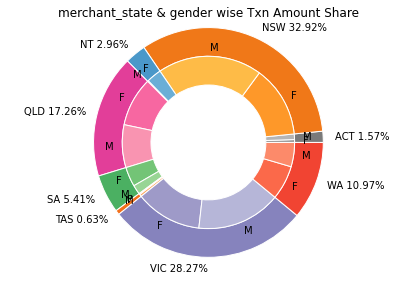

In [61]:
#Donut_by_merchant_state_gender_sum
import matplotlib.pyplot as plt
 
# Make data: I have 8 groups and 16 subgroups
group_names=['ACT 1.57%', 'NSW 32.92%', 'NT 2.96%', 'QLD 17.26%', 'SA 5.41%', 'TAS 0.63%', 'VIC 28.27%', 'WA 10.97%' ]
group_size=[4876.68 ,102021.77,9168.89 ,53483.45,16776.57,1962.93 ,87584.00 ,33992.06]
subgroup_names=[ 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
subgroup_size=[1657.44 ,3219.24,41430.88 ,60590.89 , 8741.42 ,427.47, 28611.05 , 24872.40,11349.73 ,5426.84,
              622.72 ,1340.21, 38626.01 ,48957.99 ,19908.15 ,14083.91]

# Create colors
a, b, c, d, e, f, g, h =[plt.cm.Greys, plt.cm.YlOrBr, plt.cm.Blues, plt.cm.RdPu, plt.cm.Greens, plt.cm.Oranges,
                         plt.cm.Purples, plt.cm.Reds ]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)
                                                                      ,d(0.6), e(0.6), f(0.6), g(0.6), h(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2-0.3, labels=subgroup_names,  
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4), d(0.5), d(0.4), e(0.5), e(0.4), f(0.5), f(0.4),
                          g(0.5), g(0.4), h(0.5), h(0.4)])

plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('merchant_state & gender wise Txn Amount Share')
plt.margins(0,0)
plt.tight_layout()

# show it
plt.show()

Almost 60% of Total Debit Txn amount is going to the merchants of VIC and NSW.

Females have contributed more than the males in QLD, SA WA and NT.

In total Females have done more Debit Txn than males.

## 7. Transaction Trend

#### grouping the data by_date_count

In [65]:
by_date_count = df_new.groupby([
'date',
]).count()

In [66]:
drop_features2 = ['card_present_flag', 'merchant_code', 'balance', 'age', 'amount','status','bpay_biller_code', 'account',
                 'currency', 'long_lat', 'txn_description', 'merchant_id', 'merchant_code', 'first_name', 'gender',
                  'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id', 'transaction_id', 'country',
                 'customer_id', 'merchant_long_lat', 'movement', 'day_name', 'month_name']
by_date_count.drop(drop_features2, axis = 1, inplace = True )

In [73]:
by_date_count = by_date_count.unstack()
by_date_count.head()

,Debit_amount,Credit_amount
date,,
2018-08-01,124,13
2018-08-02,142,10
2018-08-03,142,15
2018-08-04,118,0
2018-08-05,100,0


In [74]:
by_date_count.rename(columns = {'Debit_amount':'Debit', 'Credit_amount':'Credit'}, inplace = True) 

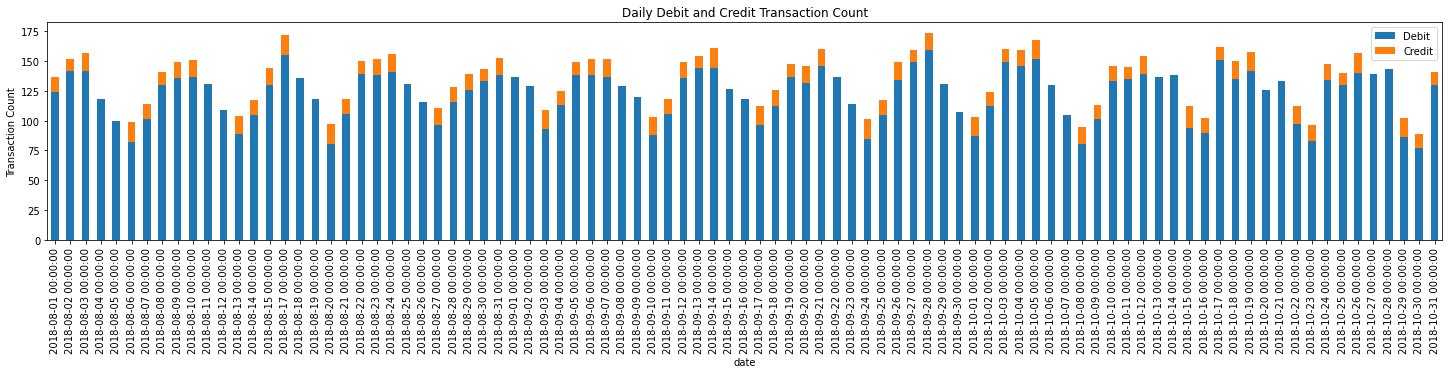

In [75]:
# Visualize this data in bar plot
ax = (by_date_count).plot(
kind='bar',
figsize=(25, 4),
stacked=True
)

ax.set_ylabel('Transaction Count')
plt.title('Daily Debit and Credit Transaction Count')
plt.show()

#### grouping the data by_date_sum

In [76]:
by_date_sum = df_new.groupby([
'date',
]).sum()

In [81]:
by_date_sum = by_date_sum.unstack()
by_date_sum.head()

,card_present_flag,merchant_code,balance,age,amount,Debit_amount,Credit_amount
date,,,,,,,
2018-08-01,63.0,0.0,1360954.62,4142.0,29867.94,5546.44,24321.50
2018-08-02,85.0,0.0,2122469.92,4787.0,21786.32,7558.09,14228.23
2018-08-03,79.0,0.0,1599482.51,4985.0,38096.58,8035.90,30060.68
2018-08-04,74.0,0.0,968403.51,3662.0,6296.05,6296.05,0.00
2018-08-05,54.0,0.0,1329752.54,2991.0,4426.50,4426.50,0.00


In [82]:
drop_features = ['card_present_flag', 'merchant_code', 'balance', 'age', 'amount']
by_date_sum.drop(drop_features, axis = 1, inplace = True )

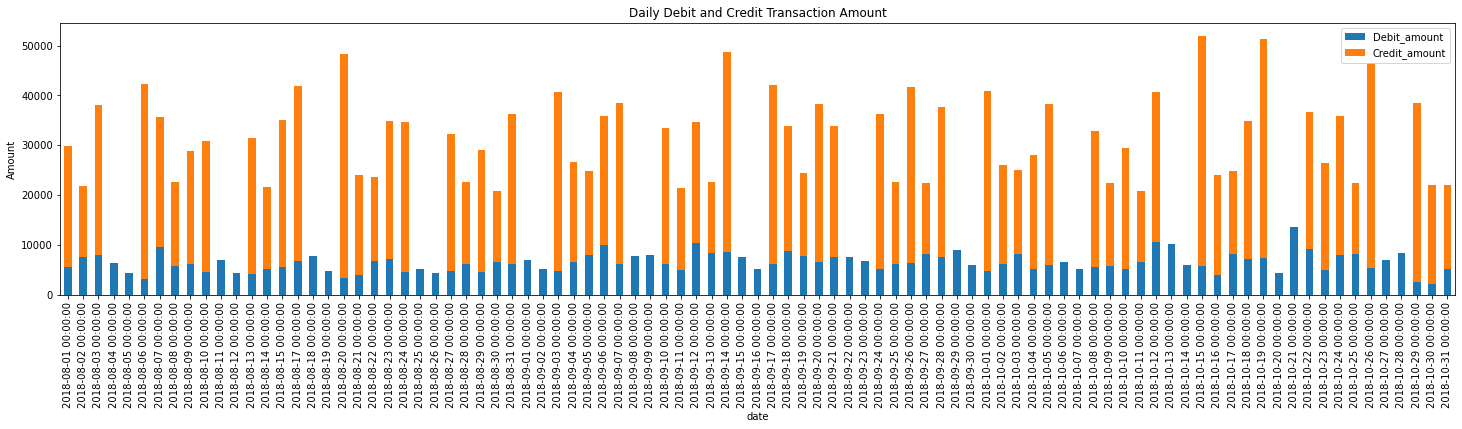

In [83]:
# Visualize this data in bar plot
ax = (by_date_sum).plot(
kind='bar',
figsize=(25, 5),
stacked=True
)
ax.set_ylabel('Amount')
plt.title('Daily Debit and Credit Transaction Amount')
plt.show()

In both cases of daily transaction count and total transaction amount, there is a cyclic trend over the whole time period. 

No. of Credit transactions are very less compared to no. of Debit Transactions where as majority contribution of transaction amount is coming from Credit Transactions. On another note, we see that, there is no credit transactions at frequent intervals, on weekends.


## 8. Transactions on various days of a Month

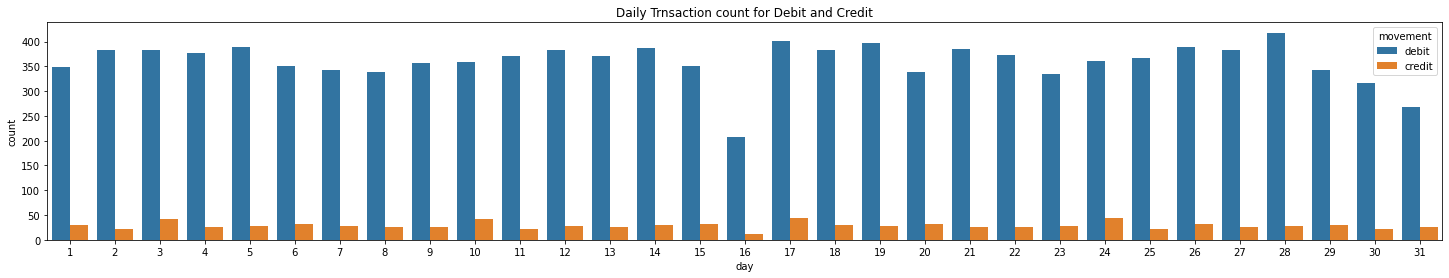

In [84]:
df_new['day'] = pd.DatetimeIndex(df_new['date']).day
plt.figure(figsize=(25,4))
plt.title('Daily Trnsaction count for Debit and Credit')
sns.countplot(x=df_new['day'],hue='movement',data=df_new)

In [85]:
# grouping the data by_day_movement_sum
by_day_movement_sum = df_new.groupby([
'day', 
]).sum()

In [90]:
by_day_movement_sum = by_day_movement_sum.unstack().fillna(0)
by_day_movement_sum.head()

,card_present_flag,merchant_code,balance,age,amount,Debit_amount,Credit_amount
day,,,,,,,
1,199.0,0.0,5032438.74,11144.0,77551.86,17200.40,60351.46
2,212.0,0.0,5748222.34,12223.0,53073.61,18872.36,34201.25
3,208.0,0.0,6228701.26,12782.0,103795.05,20885.43,82909.62
4,212.0,0.0,4677514.33,12718.0,60825.68,18088.96,42736.72
5,216.0,0.0,6275648.32,12641.0,67536.56,18396.24,49140.32


In [91]:
drop_features = ['card_present_flag', 'merchant_code', 'balance', 'age', 'amount']
by_day_movement_sum.drop(drop_features, axis = 1, inplace = True )

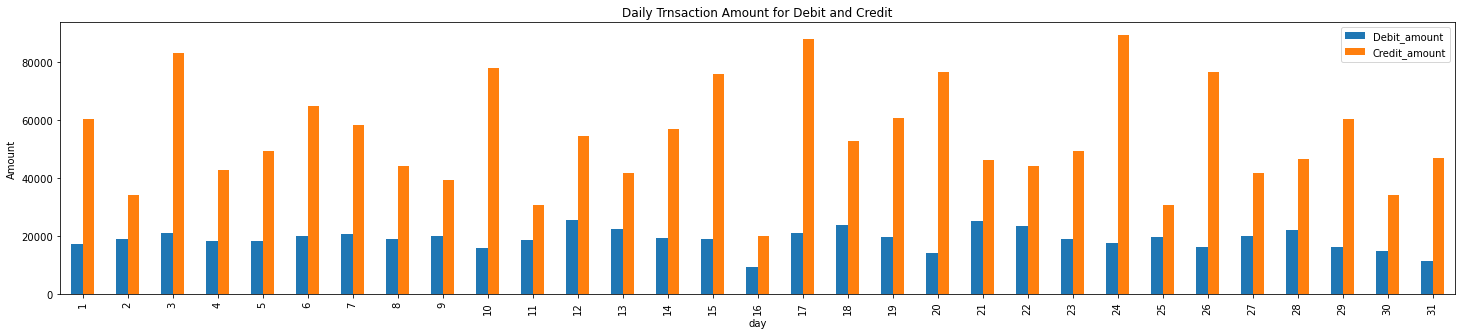

In [92]:
# Visualize this data in bar plot
ax = (by_day_movement_sum).plot(
kind='bar',
figsize=(25,5),

)
ax.set_ylabel('Amount')
plt.title('Daily Trnsaction Amount for Debit and Credit')
plt.show()

We can observe a downward trend in no. of Debit Txn counts and Debit amount at the end of the months.

There are peaks in Credit Amounts at a regular interval on the dates 3, 10, 17 and 24. Other than that, we can see cyclic nature in both Credit and Debit amount over the days.
